# import, data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
COLUMNS = ["user_id" ,"trip", "course", "place_id","place_name", "place_category","rating", "review", "place_address", "place_lat", "place_lng","y", "belief", "y_pred"]

In [4]:
data_0 = pd.read_csv('/content/drive/MyDrive/csv_result_data/recommend_li_couple_after.csv', names = COLUMNS, header=None, skiprows = 1)

data_family_after = pd.read_csv('/content/drive/MyDrive/csv_result_data/recommend_li_family_after.csv', names = COLUMNS, header=None, skiprows = 1)

data_hotel_after = pd.read_csv('/content/drive/MyDrive/csv_result_data/recommend_li_hotel_after.csv', names = COLUMNS, header=None, skiprows = 1)

data_guesthouse_after = pd.read_csv('/content/drive/MyDrive/csv_result_data/recommend_li_guesthouse_after.csv', names = COLUMNS, header=None, skiprows = 1)

data_pension_after = pd.read_csv('/content/drive/MyDrive/csv_result_data/recommend_li_pension_after.csv', names = COLUMNS, header=None, skiprows = 1)

In [5]:
data_couple_after = data_0.fillna(data_0['place_lat'].mean())
data_couple_after.loc[221]

user_id                     446
trip                     couple
course                        6
place_id                   2508
place_name            1.5닭갈비 본점
place_category              닭요리
rating                        4
review                      171
place_address     강원 춘천시 후만로 77
place_lat               37.8763
place_lng               127.753
y                             0
belief                     -135
y_pred                 5.98e-11
Name: 221, dtype: object

In [6]:
data_couple_after

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
0,649,couple,1,2753,38마일,디저트카페,3.8,4,강원 춘천시 남산면 종자리로 42,37.745248,127.712175,0,-135,1.880000e-12
1,649,couple,4,2508,1.5닭갈비 본점,닭요리,4.0,171,강원 춘천시 후만로 77,37.876336,127.753077,0,-135,8.460000e-13
2,649,couple,10,2566,LDH맥반석문어숯불닭갈비,닭요리,4.5,33,강원 춘천시 남산면 강촌구곡길 9 1층,37.802923,127.624128,0,-65,3.080000e-13
3,649,couple,4,593,9남매집,두부전문점,4.6,85,강원 강릉시 초당원길 63-2,37.786889,128.913850,0,-90,6.660000e-14
4,649,couple,3,2119,가락재,고개,0.0,0,강원 춘천시 동면 상걸리 산 5-7,37.855355,127.866415,0,-10,5.910000e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,596,couple,9,2508,1.5닭갈비 본점,닭요리,4.0,171,강원 춘천시 후만로 77,37.876336,127.753077,0,-135,3.870000e-09
246,596,couple,2,2753,38마일,디저트카페,3.8,4,강원 춘천시 남산면 종자리로 42,37.745248,127.712175,0,-135,5.400000e-11
247,596,couple,3,2994,24시전주명가콩나물국밥 장학점,국밥,5.0,2,강원 춘천시 동면 춘천로 451,37.895824,127.760379,0,-45,3.260000e-11
248,596,couple,5,2119,가락재,고개,0.0,0,강원 춘천시 동면 상걸리 산 5-7,37.855355,127.866415,0,-10,5.210000e-13


# entropy diversity 함수

In [7]:
def get_entropy_diversity(data):
  entropy_diversity = 0
  for i in range(250):
    place_id = data.loc[i]['place_id']
    count = 1
    for j in range(250):
      if j!=i:
        compare_place_id = data.loc[j]['place_id']
        if place_id == compare_place_id:
          count += 1
    p = count/250
    aoi = -math.log(p)
    expected_value = p*aoi
    entropy_diversity += expected_value
  return entropy_diversity

# entropy diversity 구하기

In [8]:
total_entropy = np.zeros(shape=5)
total_entropy[0] = get_entropy_diversity(data_couple_after)
total_entropy[1] = get_entropy_diversity(data_family_after)
total_entropy[2] = get_entropy_diversity(data_hotel_after)
total_entropy[3] = get_entropy_diversity(data_guesthouse_after)
total_entropy[4] = get_entropy_diversity(data_pension_after)

entropy = sum(total_entropy)/len(total_entropy)
print(total_entropy)
print(entropy)

[57.07645278 13.09748862 57.85354053 40.8064482  67.27115276]
47.2210165782577


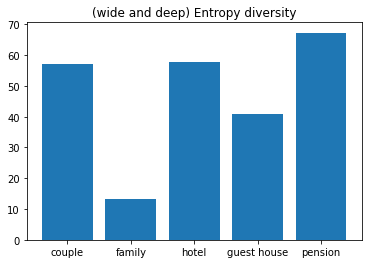

In [9]:
x_axis = ['couple', 'family', 'hotel', 'guest house', 'pension']
plt.bar(x_axis,total_entropy)
plt.title('(wide and deep) Entropy diversity')
plt.show()

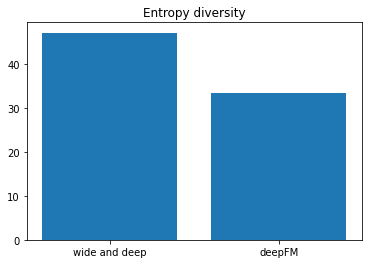

In [10]:
y_axis = [47.2210165782577, 33.42314638943616]
x_axis = ['wide and deep', 'deepFM']
plt.bar(x_axis,y_axis)
plt.title('Entropy diversity')
plt.show()